Berner Fachhochschule BFH - MAS Data Science - Graph Machine Learning - Master Thesis FS/2022 Thomas Iten

# Experiment 3 - Similarity Scenario C

**Referenzen**<br />
[1] https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html<br />
[2] Stamile, Marzullo, Deusebio. Graph Machine Learning. Packt Publishing 2021. ISBN 978-1-80020-449-2



In [1]:
from gml.graph.graph_link import GraphLink, Algorithm
from gml.graph.graph_viz import GraphViz
from gml.graph.data_factory import DataFactory, EdgeLabelFactory

## 3.1 Data Structure

### Datensammlung - Mitarbeiter typisiert

<img src="img/test-scenario3.png" alt="Test Scenario 3" width="800"/>

## 3.2 Exploration

### Create graph and link predictions for all missing edges

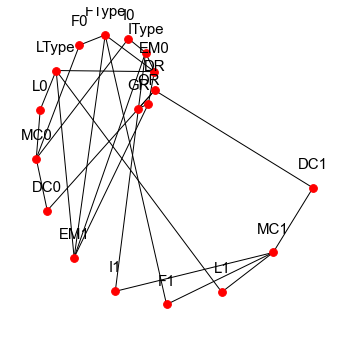

Link Predictions:
               Edge   CN  PA        JC        AA
0         (GR, EM0)  2.6   8  0.200000  0.910239
1       (GR, IType)  1.2   8  0.000000  0.000000
2          (GR, I0)  0.9   4  0.000000  0.000000
3       (GR, FType)  1.2   8  0.000000  0.000000
4          (GR, F0)  0.9   4  0.000000  0.000000
5       (GR, LType)  1.2   8  0.000000  0.000000
6          (GR, L0)  0.9   4  0.000000  0.000000
7         (GR, MC0)  1.2   8  0.000000  0.000000
8         (GR, DC0)  2.6   4  0.333333  0.910239
9         (GR, EM1)  2.6   8  0.200000  0.910239
10         (GR, I1)  0.9   4  0.000000  0.000000
11         (GR, F1)  0.9   4  0.000000  0.000000
12         (GR, L1)  0.9   4  0.000000  0.000000
13        (GR, MC1)  1.2   8  0.000000  0.000000
14        (GR, DC1)  2.6   4  0.333333  0.910239
15         (OR, DR)  2.6   9  0.200000  1.442695
16      (OR, IType)  3.4  12  0.400000  1.442695
17         (OR, I0)  1.2   6  0.000000  0.000000
18      (OR, FType)  3.4  12  0.400000  1.442695
19

In [2]:
graph = DataFactory().create_graph(n=2, connected=True, add_dc=True, typed=True)
graph.draw(layout=GraphViz.SPIRAL_LAYOUT)

possible_edges = graph.missing_edges()

gl = GraphLink(graph, possible_edges)\
    .predict(Algorithm.COMMON_NEIGHBOR_CENTRALITY)\
    .predict(Algorithm.PREFERENTIAL_ATTACHMENT)\
    .predict(Algorithm.JACCARD_COEFFICIENT)\
    .predict(Algorithm.ADAMIC_ADAR_INDEX)

gl.print_results(title="Link Predictions:")

### Normalize results, filter edges of interest, label results and show metrics

In [3]:
gl.normalize()
gl.filter([("EM0","DC0"),("EM0", "DC1"),("EM1","DC0"),("EM1", "DC1")])

gl.print_results(title="Predictions normalized:", incl_legend=False)
print()

gl.label(threshold=0.8)
gl.print_results(title="Prediction labels with threshold 0.8:", incl_legend=False)
print()

y_true = [1,0,0,1]
gl.print_metrics(y_true, title="Metrics:")

Predictions normalized:
         Edge    CN   PA   JC   AA
0  (EM0, DC0)  0.18  0.5  0.0  0.0
1  (EM0, DC1)  0.18  0.5  0.0  0.0
2  (EM1, DC0)  0.18  0.5  0.0  0.0
3  (EM1, DC1)  0.18  0.5  0.0  0.0

Prediction labels with threshold 0.8:
         Edge  CN  PA  JC  AA
0  (EM0, DC0)   0   0   0   0
1  (EM0, DC1)   0   0   0   0
2  (EM1, DC0)   0   0   0   0
3  (EM1, DC1)   0   0   0   0

Metrics:
      Metric   CN   PA   JC   AA
0  Precision  0.0  0.0  0.0  0.0
1     Recall  0.0  0.0  0.0  0.0
2   F1-Score  0.0  0.0  0.0  0.0

Legend:
  CN  = Common Neighbor Centrality
  PA  = Preferential Attachment
  JC  = Jaccard Coefficient
  AA  = Adamic Adar Index


## 3.3 Tests

### Create link predictions and show metrics for edge samples of interest

In [4]:
n = 100
graph = DataFactory().create_graph(n=n, connected=True, add_dc=True, typed=True)

edges, labels = EdgeLabelFactory().sample("DC", "EM", n, p=0.1, shuffle=True)

gl = GraphLink(graph, edges)\
    .predict(Algorithm.COMMON_NEIGHBOR_CENTRALITY)\
    .predict(Algorithm.PREFERENTIAL_ATTACHMENT)\
    .predict(Algorithm.JACCARD_COEFFICIENT)\
    .predict(Algorithm.ADAMIC_ADAR_INDEX)

gl.normalize()
gl.label(threshold=0.8)
gl.print_metrics(labels)

Metrics
      Metric        CN        PA   JC   AA
0  Precision  0.500000  0.500000  0.0  0.0
1     Recall  1.000000  1.000000  0.0  0.0
2   F1-Score  0.666667  0.666667  0.0  0.0

Legend:
  CN  = Common Neighbor Centrality
  PA  = Preferential Attachment
  JC  = Jaccard Coefficient
  AA  = Adamic Adar Index


### Create link predcitions for all possible edges first and then show metrics for edge samples of interest

In [5]:
n = 100
graph = DataFactory().create_graph(n=n, connected=True, add_dc=True, typed=True)

possible_edges =  graph.missing_edges()

gl = GraphLink(graph, possible_edges)\
    .predict(Algorithm.COMMON_NEIGHBOR_CENTRALITY)\
    .predict(Algorithm.PREFERENTIAL_ATTACHMENT)\
    .predict(Algorithm.JACCARD_COEFFICIENT)\
    .predict(Algorithm.ADAMIC_ADAR_INDEX)

gl.normalize()

edges, labels = EdgeLabelFactory().sample("DC", "EM", n, p=0.1, shuffle=True)
gl.filter(edges)

gl.label(threshold=0.8)
gl.print_metrics(labels)

Metrics
      Metric   CN   PA   JC   AA
0  Precision  0.0  0.0  0.0  0.0
1     Recall  0.0  0.0  0.0  0.0
2   F1-Score  0.0  0.0  0.0  0.0

Legend:
  CN  = Common Neighbor Centrality
  PA  = Preferential Attachment
  JC  = Jaccard Coefficient
  AA  = Adamic Adar Index


---
_The end._